In [27]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [28]:
import re
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Srija\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
from nltk.util import pr
from nltk.corpus import stopwords
stemmer= nltk.SnowballStemmer("english")
import string
stopword= set(stopwords.words("english"))

In [30]:
df=pd.read_csv('twitter_data.csv')


In [16]:
print(df.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [18]:
df['labels']=df['class'].map({0:"hate speech detected",1:"offensive language detected" ,2:"no hate and offensive speech"})
print(df.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

                         labels  
0  no hate and offensive speech  
1   offensive language detected  
2   offensive language detected  
3   offensive language detected  
4   offensive language detected  


In [19]:
df_transformed=df[['tweet','labels']]
df_transformed.head()

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,no hate and offensive speech
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive language detected
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive language detected
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive language detected
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive language detected


[Text(0, 0, 'hate speech'),
 Text(1, 0, 'offensive language'),
 Text(2, 0, 'no hate and offensive speech')]

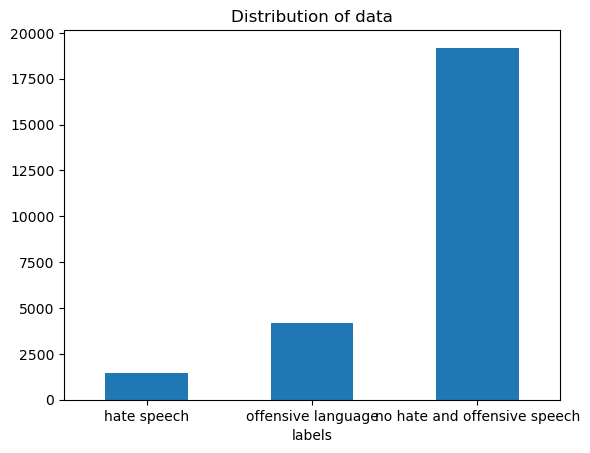

In [20]:
fig = df_transformed.groupby('labels').count().plot(kind='bar', title='Distribution of data',
                                               legend=False)
fig.set_xticklabels(['hate speech','offensive language','no hate and offensive speech'], rotation=0)

In [21]:
def clean(text):
   text = str(text).lower()
   text = re.sub('\[.*?\]', '',text)
   text = re.sub('https?;//\S+|www\.\S+','',text) #url pattern
   text = re.sub('<.*?>+','',text) #special characters
   text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
   text = re.sub('\n','',text) #new line pattern
   text = re.sub('\w*\d\w*','',text)
   text = [word for word in text.split() if word not in stopword]
   text = " ".join(text)
   text = [stemmer.stem(word) for word in text.split()]
   text =" ".join(text)
   return text
df_transformed["tweet"] = df_transformed["tweet"].apply(clean)
print(df_transformed.head())

                                               tweet  \
0  rt mayasolov woman shouldnt complain clean hou...   
1   rt boy dat coldtyga dwn bad cuffin dat hoe place   
2  rt urkindofbrand dawg rt ever fuck bitch start...   
3             rt cganderson vivabas look like tranni   
4  rt shenikarobert shit hear might true might fa...   

                         labels  
0  no hate and offensive speech  
1   offensive language detected  
2   offensive language detected  
3   offensive language detected  
4   offensive language detected  


C:\Users\Srija\AppData\Local\Temp\ipykernel_14696\4124099480.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transformed["tweet"] = df_transformed["tweet"].apply(clean)


In [22]:
x= np.array(df_transformed["tweet"])
y= np.array(df_transformed["labels"])
cv = CountVectorizer()
x = cv.fit_transform(x)
X_train ,X_test,Y_train ,Y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [23]:
classif_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classif_rf.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [24]:
test_data = "bitch nigga miss me with it " ;
df_transformed= cv.transform([test_data]).toarray()
print(classif_rf.predict(df_transformed))

['offensive language detected']


In [31]:
Y_pred = classif_rf.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[ 125   35  305]
 [  14 1053  312]
 [ 117  220 5998]]


In [32]:
rf_score = accuracy_score(Y_test, Y_pred)
print('Random Forest Accuracy: ', str(rf_score))

Random Forest Accuracy:  0.8773688715001834
